(a) For the case above, compute how $\alpha_I$ looks like given fixed sample size $n$ for different levels of significance $\alpha$. Remind you, that
$$
\alpha_I=P_{H_0}\left(t\left(x_1, \ldots, x_n\right) \in A_{\text {crit }}\right),
$$
where the definition of $A_{\text {crit }}$ depends on $\alpha$.
Hint: How to estimate the probability for fixed $\alpha$ ?
- Generate $m$ different samples from the distribution, described by null hypothesis.
- Compute the proportion of samples, for which $t\left(x_1, \ldots, x_n\right) \in$ $A_{\text {crit }}$ i.e. the null hypothesis is rejected.

(b) Chose some specific alternative hypothesis $H_I$. Using the similar for the $\alpha_I$ logic, compute how $\alpha_{I I}$ looks like given different levels of significance $\alpha$. Show, how this plot changes, when we change the alternative $H_I$.
$$
\alpha_{I I}=P_{H_1}\left(t\left(x_1, \ldots, x_n\right) \in A_{\text {conf }}\right),
$$

In [8]:
from scipy.stats import bernoulli, norm
from math import sqrt
from numpy import arange
import matplotlib.pyplot as plt

In [24]:
def generate_sample_estimate(n, p):
    sample = bernoulli.rvs(p, size=n)
    return sum(sample) / n

def calculate_statistics(n, p, sample_estimate):
    return sqrt(n) * (sample_estimate - p) / sqrt(p * (1 - p))

def generate_first_type_error_for_alpha(alpha, n, p):
    u = norm.ppf(alpha, loc=0, scale=1)
    results = [1 if u < calculate_statistics(n, p, generate_sample_estimate(n, p)) else 0 for i in range(1000)]
    return sum(results) / len(results)

def generate_second_type_error_for_alpha(alpha, n, p_real, p_generating):
    u = norm.ppf(alpha, loc=0, scale=1)
    results = [1 if u > calculate_statistics(n, 
                                             p_real, 
                                             generate_sample_estimate(n, p_generating)) else 0 for i in range(1000)]
    return sum(results) / len(results)

In [25]:
alphas = []
first_type_errors = []
for alpha in arange(0, 1, 0.01):
    alphas.append(alpha)
    first_type_errors.append(generate_first_type_error_for_alpha(alpha, 100, 0.7))

For the first type error we can see that it gets smaller with the growth of confidence level $\alpha$. The dependancy type seems to be linear. It looks quite logical because the less $\alpha$ is the more area under the plot of the distribution we wouldn't cover.

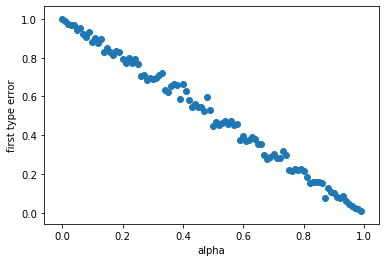

In [26]:
plt.scatter(x=alphas, y=first_type_errors)
plt.xlabel("alpha")
plt.ylabel("first type error")
plt.show()

For the second type error we get opposite situation. The larger $\alpha$ we take the less second type error probability is. It can also be showed with the logic I used for first type error dependancy explanation. 

I actually found it really interesting that the more we deviate from the null hypothesis the more steep our plot becomes. But it's also logical as the more we deviate from the null hypothesis the more chances we have to catch this.

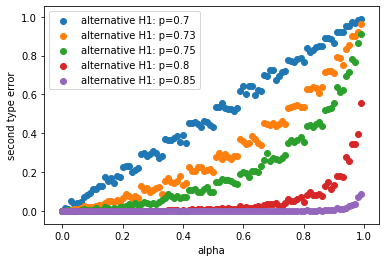

In [27]:
def generate_results_for_alternative(p_generating=0.8):
    alphas = []
    second_type_errors = []
    for alpha in arange(0, 1, 0.01):
        alphas.append(alpha)
        second_type_errors.append(generate_second_type_error_for_alpha(alpha, 100, 0.7, p_generating))
    plt.scatter(x=alphas, y=second_type_errors, label=f'alternative H1: p={p_generating}')

for p_gen in [0.7, 0.73, 0.75, 0.8, 0.85]:
    generate_results_for_alternative(p_gen)

plt.legend()
plt.xlabel("alpha")
plt.ylabel("second type error")
plt.show()